In [2]:
import json

with open('../../data/segraw_EMG_allgestures_allusers.json', 'r') as f:
    data = json.load(f)

In [24]:
subjects = data.keys()
print(subjects)

dict_keys(['P102', 'P103', 'P104', 'P105', 'P106', 'P107', 'P108', 'P109', 'P110', 'P111', 'P112', 'P114', 'P115', 'P116', 'P118', 'P119', 'P121', 'P122', 'P123', 'P124', 'P125', 'P126', 'P127', 'P128', 'P131', 'P132', 'P004', 'P005', 'P006', 'P008', 'P010', 'P011'])


In [88]:
s = next(iter(subjects))
gestures = data[s].keys()
print(f"Number of gestures for subject {s}: {len(gestures)}")
print(f"Gestures for subject {s}: {gestures}")

Number of gestures for subject P102: 10
Gestures for subject P102: dict_keys(['pan', 'duplicate', 'zoom-out', 'zoom-in', 'move', 'rotate', 'select-single', 'delete', 'close', 'open'])


In [ ]:
g = next(iter(gestures))
indices = data[s][g].keys()
print(f"Number of indices for gesture {g} of subject {s}: {len(indices)}")

Number of indices for gesture pan of subject P102: 10


In [ ]:
idx = '4'
data_key = data[s][g][idx].keys()
data_key = list(data_key)[0]  # Get the first key for the sample index
print(f"Data key for sample index {idx} of gesture {g} of subject {s}: {data_key}")

Data key for sample index 4 of gesture pan of subject P102: EMG


In [ ]:
import numpy as np

for idx in indices:
    sample_data = data[s][g][idx][data_key]
    sample_data = np.array(sample_data)
    print(f"Sample data shape for key '{data_key}': {sample_data.shape}")

Sample data shape for key 'EMG': (16, 6380)
Sample data shape for key 'EMG': (16, 7220)
Sample data shape for key 'EMG': (16, 6860)
Sample data shape for key 'EMG': (16, 6380)
Sample data shape for key 'EMG': (16, 6740)
Sample data shape for key 'EMG': (16, 6740)
Sample data shape for key 'EMG': (16, 6860)
Sample data shape for key 'EMG': (16, 5780)
Sample data shape for key 'EMG': (16, 5900)
Sample data shape for key 'EMG': (16, 4340)


Index 1: Original length 4581, Resampled length 8192
Index 2: Original length 4700, Resampled length 8192
Index 3: Original length 5180, Resampled length 8192
Index 4: Original length 4940, Resampled length 8192
Index 5: Original length 5060, Resampled length 8192
Index 6: Original length 5300, Resampled length 8192
Index 7: Original length 6020, Resampled length 8192
Index 8: Original length 5660, Resampled length 8192
Index 9: Original length 5420, Resampled length 8192
Index 10: Original length 6020, Resampled length 8192


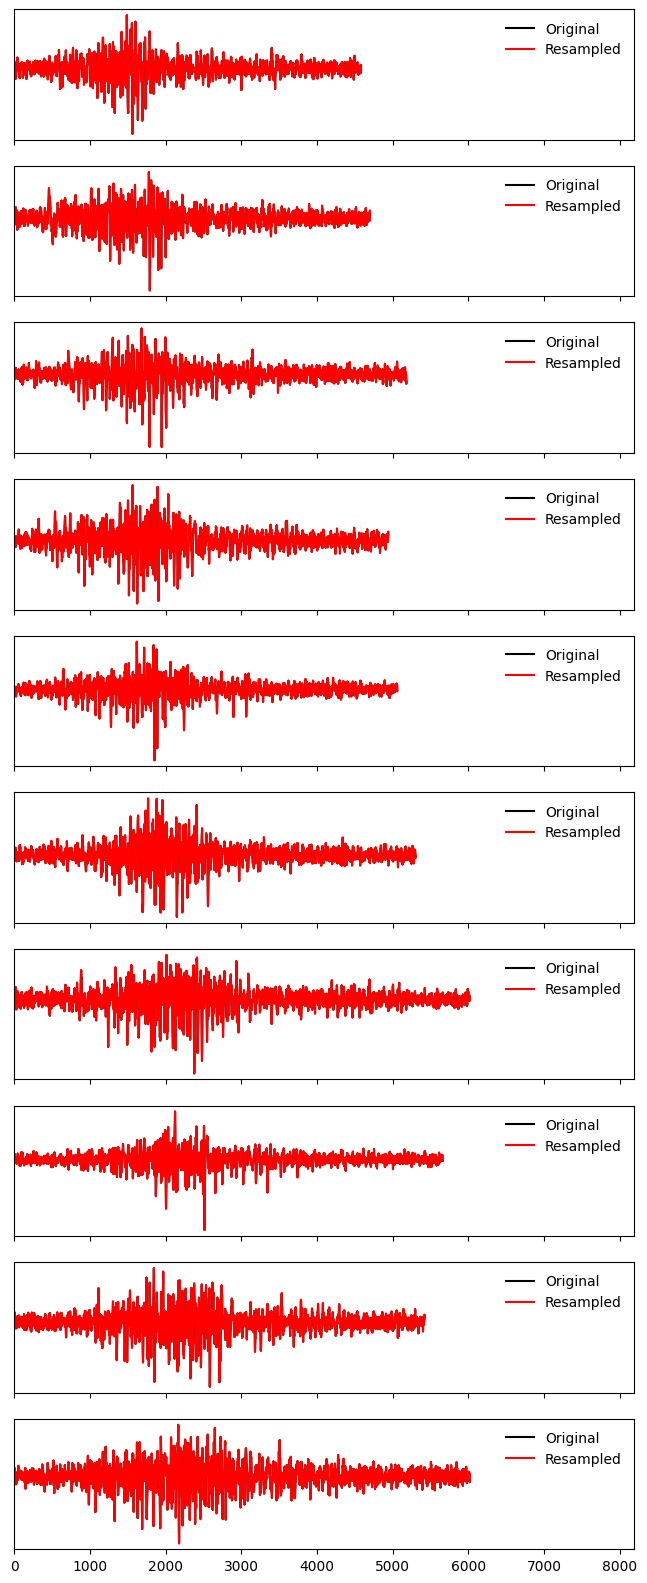

In [ ]:
import matplotlib.pyplot as plt
from scipy.signal import resample

fig, axes = plt.subplots(figsize=(8, 20), nrows=10, ncols=1, sharex=True)

for idx in indices:
    ax = axes[int(idx) - 1]
    sample_data = data[s][g][idx][data_key]
    sample_data = np.array(sample_data)[0, :]
    sample_timestamps = np.arange(len(sample_data))
    
    resampled_data, resampled_timestamps = resample(sample_data, t=sample_timestamps, num=8192)
    
    ax.plot(sample_timestamps, sample_data, 'k', label='Original')
    ax.plot(resampled_timestamps, resampled_data, 'r', label='Resampled')
    print(f"Index {idx}: Original length {len(sample_data)}, Resampled length {len(resampled_data)}")
    ax.set_yticks([])
    ax.legend(loc='upper right', frameon=False)

plt.xlim(0, 8192)
plt.show()